In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data_original=pd.read_excel("Raw_data.xlsx", sheet_name='CustomerDemographic')

C:\Users\Admin\AppData\Local\Temp\ipykernel_14444\1893045066.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  data_original=pd.read_excel("Raw_data.xlsx", sheet_name='CustomerDemographic')


In [3]:
data_original.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [5]:
data_original.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [6]:
data_original["last_name"].fillna("None",axis=0,inplace=True)

In [7]:
data_original["last_name"].isnull().sum()

0

In [8]:
nan_index=data_original[data_original["DOB"].isnull()].index

In [9]:
data_original.drop(index=nan_index, inplace=True, axis=0)

In [10]:
data_original["DOB"].isnull().sum()

0

In [11]:
data_original.drop(columns="default",inplace=True)

In [12]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3913 non-null   int64         
 1   first_name                           3913 non-null   object        
 2   last_name                            3913 non-null   object        
 3   gender                               3913 non-null   object        
 4   past_3_years_bike_related_purchases  3913 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3416 non-null   object        
 7   job_industry_category                3257 non-null   object        
 8   wealth_segment                       3913 non-null   object        
 9   deceased_indicator                   3913 non-null   object        
 10  owns_car    

In [13]:
data_original["job_title"].value_counts()

Business Systems Development Analyst    43
Tax Accountant                          43
Social Worker                           42
Recruiting Manager                      41
Internal Auditor                        40
                                        ..
Database Administrator II                4
Health Coach III                         3
Health Coach I                           3
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [14]:
data_original["job_title"].fillna("Is not defined",inplace=True)

In [15]:
data_original["job_title"].isnull().sum()

0

In [16]:
data_original[data_original['job_industry_category'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0
15,16,Harlin,Parr,Male,38,1977-02-27,Media Manager IV,NaN,Mass Customer,N,Yes,18.0
16,17,Heath,Faraday,Male,57,1962-03-19,Sales Associate,NaN,Affluent Customer,N,Yes,15.0
17,18,Marjie,Neasham,Female,79,1967-07-06,Professor,NaN,Affluent Customer,N,No,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3965,3966,Astrix,Sigward,Female,53,1968-09-15,Geologist I,NaN,Mass Customer,N,Yes,11.0
3973,3974,Misha,Ranklin,Female,82,1961-02-11,Technical Writer,NaN,Affluent Customer,N,Yes,9.0
3975,3976,Gretel,Chrystal,Female,0,1957-11-20,Internal Auditor,NaN,Affluent Customer,N,Yes,13.0
3982,3983,Jarred,Lyste,Male,19,1965-04-21,Graphic Designer,NaN,Mass Customer,N,Yes,9.0


In [17]:
data_original['job_industry_category'].fillna("Missed Value",inplace=True)

In [18]:
data_original['job_industry_category'].isnull().sum()

0

In [19]:
data_original.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

In [20]:
data_original['job_industry_category'].value_counts()

Manufacturing         796
Financial Services    767
Missed Value          656
Health                596
Retail                358
Property              267
IT                    152
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [21]:
data_original['gender'].value_counts()

Female    2037
Male      1872
F            1
U            1
Femal        1
M            1
Name: gender, dtype: int64

In [22]:
data_original['gender'].replace({"F":"Female","U":"Female","Femal":"Female","M":"Male"},inplace=True)

In [24]:
data_original['gender'].value_counts()

Female    2040
Male      1873
Name: gender, dtype: int64

In [25]:
data_original['wealth_segment'].value_counts()

Mass Customer        1954
High Net Worth        996
Affluent Customer     963
Name: wealth_segment, dtype: int64

In [26]:
data_original['deceased_indicator'].value_counts()

N    3911
Y       2
Name: deceased_indicator, dtype: int64

In [27]:
data_original['owns_car'].value_counts()

Yes    1974
No     1939
Name: owns_car, dtype: int64

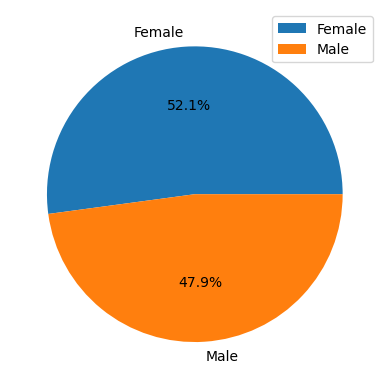

In [46]:
plt.pie(data_original['gender'].value_counts(),labels=data_original['gender'].value_counts().index,autopct='%1.1f%%')
plt.legend(data_original['gender'].value_counts().index)

In [43]:
data_val_count_z=data_original['gender'].value_counts().values

In [51]:
data_pie_columns=['gender','job_industry_category','wealth_segment','owns_car']

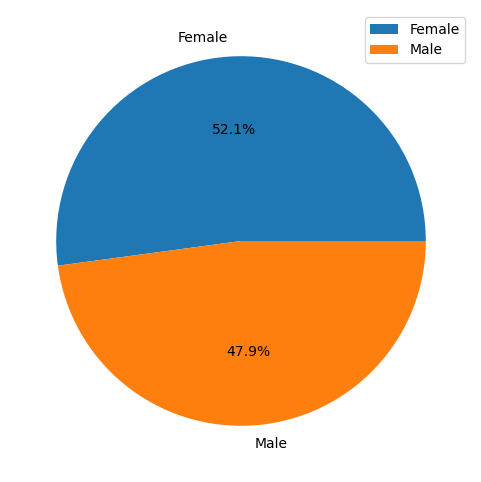

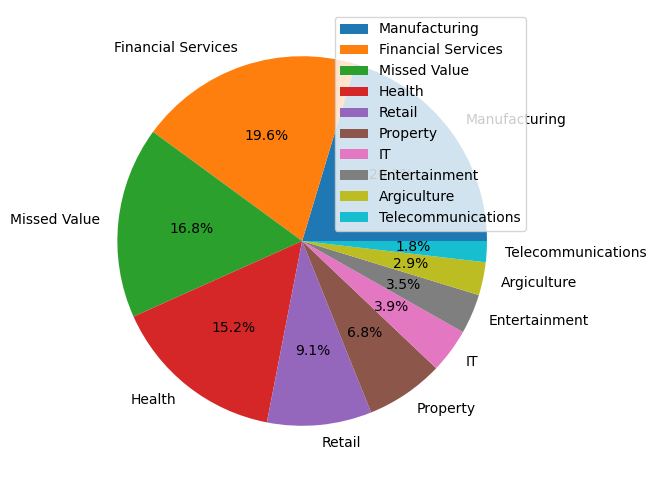

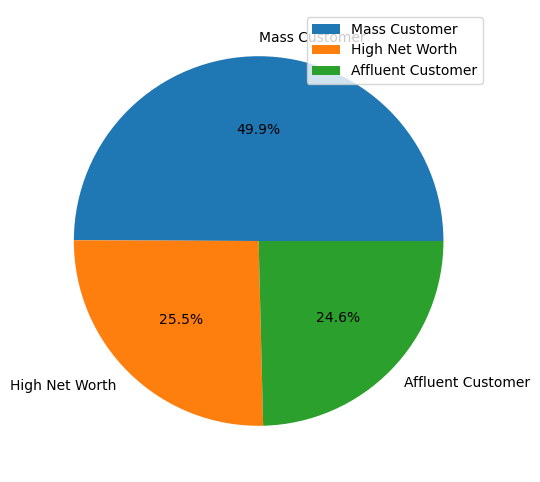

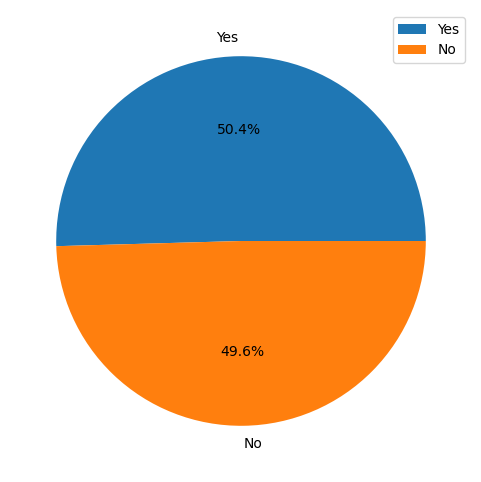

In [56]:
def show_pie(data_pie_columns):
        for i in data_pie_columns:
            plt.figure(figsize=(6,6))
            plt.pie(data_original[i].value_counts(),labels=data_original[i].value_counts().index,autopct='%1.1f%%')
            plt.legend(data_original[i].value_counts().index)
            plt.show()
show_pie(data_pie_columns)

In [57]:
data_original.to_csv('CustomerDemographic.csv', index=False)

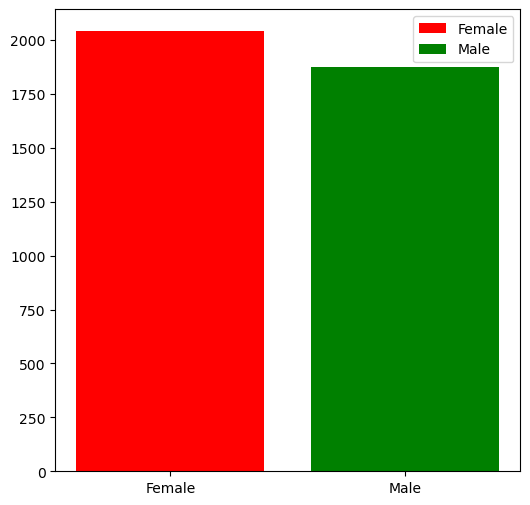

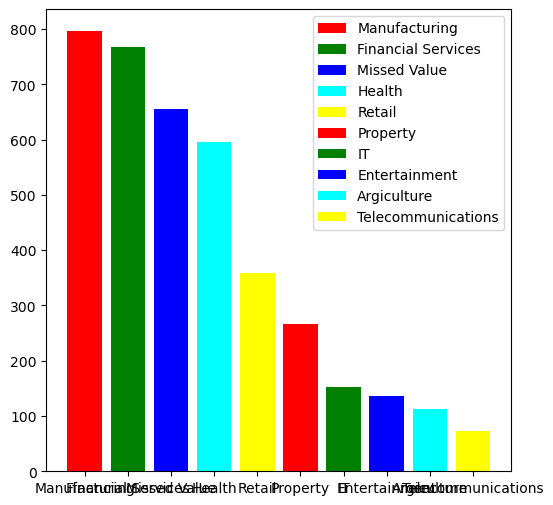

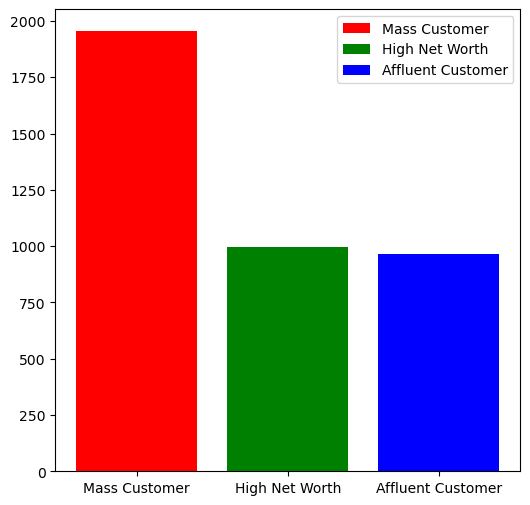

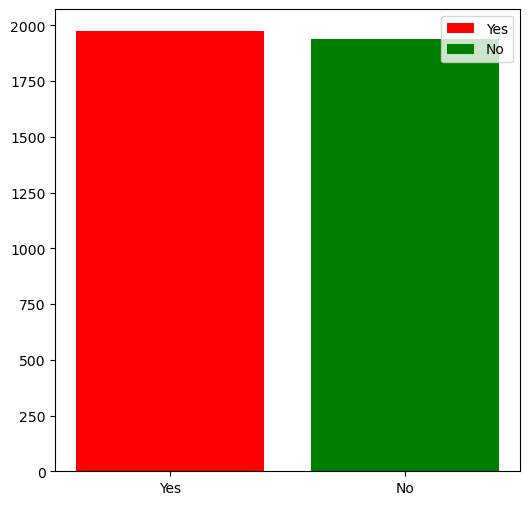

In [65]:
def bar(data_pie_columns):
        for i in data_pie_columns:
            plt.figure(figsize=(6,6))
            plt.bar(data_original[i].value_counts().index,data_original[i].value_counts(),label=data_original[i].value_counts().index,color=["red","green","blue","cyan","yellow"])
            plt.legend(data_original[i].value_counts().index)
            plt.show()
bar(data_pie_columns)